In [111]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# Reading csv file to datframe

df = pd.read_csv('/content/4.linearsep.csv',header=None)

In [113]:
# Starting 5 data points
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [114]:
# Shape of dataframe
df.shape

(100, 3)

In [115]:
df[[0,1]]

,0,1
0,-0.177497,0.930496
1,1.977424,1.766155
2,1.800024,1.700343
3,-0.770837,2.359163
4,-0.308009,1.594063
...,...,...
95,2.632382,1.271305
96,-0.040256,1.782708
97,-0.787453,1.400357
98,2.702441,1.587444


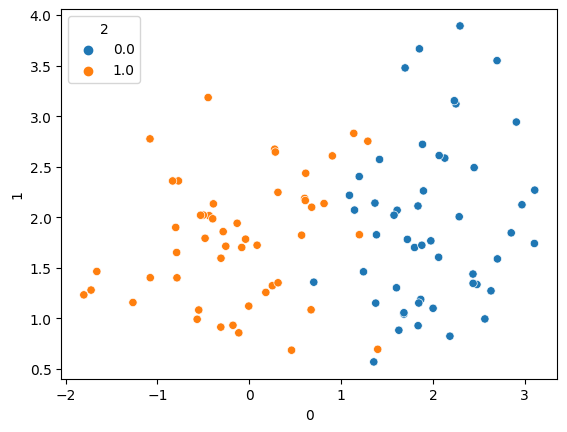

In [116]:
sns.scatterplot(x=df[0],y= df[1],hue=df[2]);

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

In [118]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [119]:
x_test.shape

(10, 2)

In [120]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainf = std.fit_transform(x_train)
x_testf = std.transform(x_test)

In [122]:
model=Sequential()
model.add(Dense(4,activation="tanh",input_dim=2))

# model.add(Dense(5,activation="tanh"))

# model.add(Dense(4,activation="tanh"))

# model.add(Dense(3,activation="tanh"))

model.add(Dense(2,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [123]:
model.get_weights()

[array([[-0.04349709,  0.30671525,  0.9463227 ,  0.454736  ],
        [ 0.7446866 , -0.42290735,  0.48406792,  0.1345141 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-8.76251936e-01, -7.08649158e-02],
        [ 1.71679020e-01,  1.04922056e-01],
        [-9.01963711e-01,  6.97422028e-03],
        [-8.50439072e-04, -6.90281391e-02]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.0376803 ],
        [-0.64580196]], dtype=float32),
 array([0.], dtype=float32)]

In [124]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 4)                 12        
                                                                 
 dense_29 (Dense)            (None, 2)                 10        
                                                                 
 dense_30 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [137]:
history=model.fit(x_trainf,y_train,epochs=160,validation_split=0.2)

Epoch 1/160
3/3 [==============================] - 0s 129ms/step - loss: 0.3794 - accuracy: 0.9028 - val_loss: 0.3862 - val_accuracy: 0.8889
Epoch 2/160
3/3 [==============================] - 0s 74ms/step - loss: 0.3760 - accuracy: 0.9167 - val_loss: 0.3830 - val_accuracy: 0.8889
Epoch 3/160
3/3 [==============================] - 0s 70ms/step - loss: 0.3727 - accuracy: 0.9167 - val_loss: 0.3794 - val_accuracy: 0.9444
Epoch 4/160
3/3 [==============================] - 0s 57ms/step - loss: 0.3691 - accuracy: 0.9167 - val_loss: 0.3760 - val_accuracy: 0.9444
Epoch 5/160
3/3 [==============================] - 0s 57ms/step - loss: 0.3657 - accuracy: 0.9306 - val_loss: 0.3727 - val_accuracy: 0.9444
Epoch 6/160
3/3 [==============================] - 0s 52ms/step - loss: 0.3623 - accuracy: 0.9306 - val_loss: 0.3694 - val_accuracy: 0.9444
Epoch 7/160
3/3 [==============================] - 0s 53ms/step - loss: 0.3588 - accuracy: 0.9444 - val_loss: 0.3663 - val_accuracy: 0.9444
Epoch 8/160
3/3 [==

In [138]:
y_cap=model.predict(x_testf)

1/1 [==============================] - 0s 26ms/step


In [139]:
y_capf=np.where(y_cap>0.5,1,0)

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.8

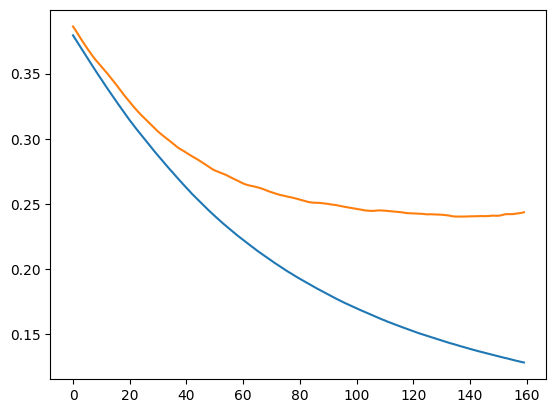

In [141]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [142]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 14s 2ms/step


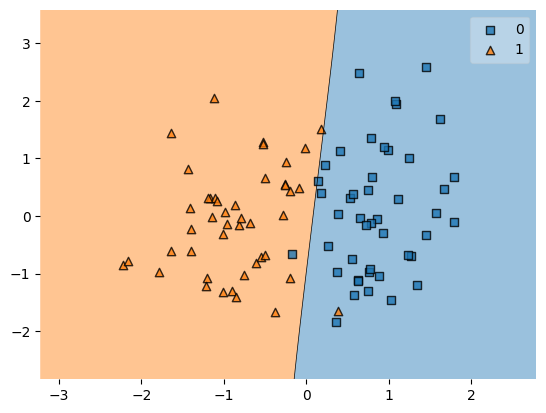

In [143]:
plot_decision_regions(x_trainf,y_train.values.astype(int),clf=model);

In [144]:
y_capf

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

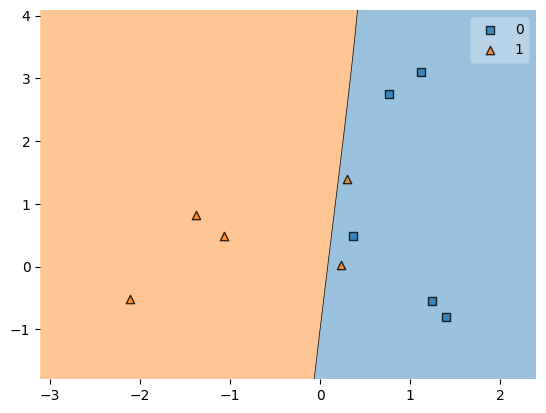

In [145]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

In [146]:
x_testf[[0,1]]

array([[0.22801668, 0.02967944],
       [0.30298878, 1.40258061]])

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

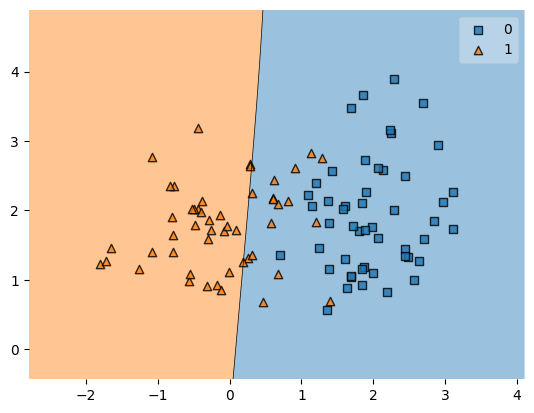

In [147]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)